## #1 Digits Classifier

In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784', version=1) 
mnist.keys()
%config IPCompleter.greedy=True

C:\Users\Sarthak\miniconda3\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
X, y = mnist['data'], mnist['target']

some_digit = X.iloc[0].to_numpy()
some_digit_image = some_digit.reshape(28, 28)



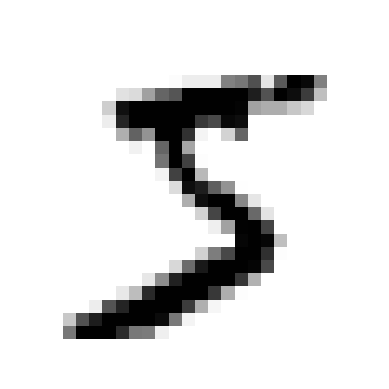

In [5]:
import matplotlib as mpl 
import matplotlib.pyplot as plt

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


In [7]:
y_train

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [8]:
from sklearn.linear_model import SGDClassifier

# Create binary classification labels
y_train_5 = (y_train.astype(int) == 5)
y_test_5 = (y_test.astype(int) == 5)

# Create and fit the classifier
model = SGDClassifier(random_state=42)
model.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [9]:
model.predict([some_digit])

C:\Users\Sarthak\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [10]:
y_train[0]

'5'

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone 


skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(model)
    X_train_fold = X_train.iloc[train_index]
    y_train_fold = y_train_5.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]

    clone_clf.fit(X_train_fold, y_train_fold)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(f"Accuracy: {n_correct / len(y_pred)}")


Accuracy: 0.9669
Accuracy: 0.91625
Accuracy: 0.96785


In [12]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(model, X_train, y_train_5, cv=3, scoring='accuracy')

In [13]:
cvs

array([0.95035, 0.96035, 0.9604 ])

In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_preds = cross_val_predict(model, X_train, y_train_5, cv=3)

coff_matrix = confusion_matrix(y_train_5, y_preds)

In [15]:
coff_matrix

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [16]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_preds)


0.8370879772350012

In [17]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_preds)

0.7325171197343846

In [18]:
y_scores = model.decision_function([some_digit])
y_scores

C:\Users\Sarthak\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [19]:
threshold = 0 
y_some_digit_pred = (y_scores > threshold)

In [20]:
y_some_digit_pred

array([ True])

In [21]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [22]:
y_scores = cross_val_predict(model, X_train, y_train_5, cv=3,
                             method='decision_function')

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

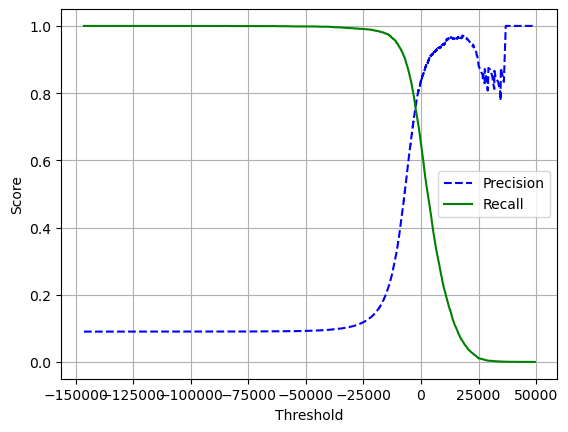

In [23]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)

# Replace 'precisions', 'recalls', and 'thresholds' with the actual data
# precisions = ...
# recalls = ...
# thresholds = ...

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [24]:
import numpy as np
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

y_train_pred_90 = (y_scores >= threshold_90_precision)

precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [25]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [26]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

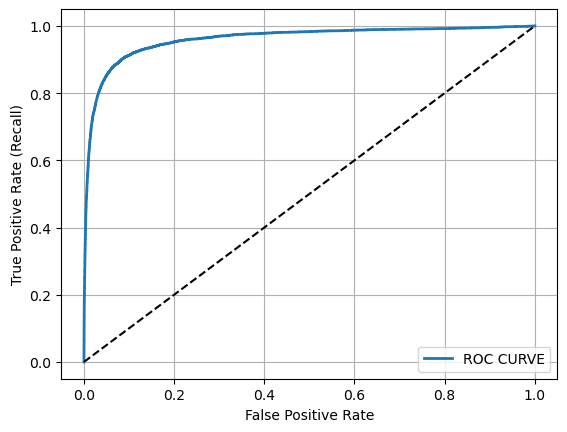

In [27]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.legend()
    plt.grid(True)
    
plot_roc_curve(fpr,tpr, label='ROC CURVE')
plt.show()

# Add axis labels and grid

In [28]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [29]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

rfc_cv = cross_val_predict(rfc, X_train, y_train_5, cv=3,
                        method='predict_proba')

In [30]:
rfc_cv

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [31]:
y_scores_forest = rfc_cv[:, 1] 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

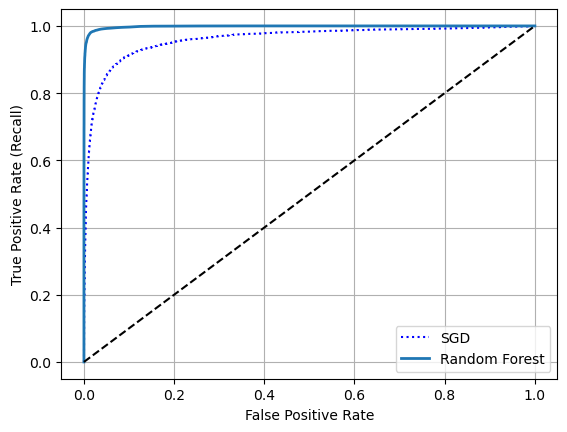

In [32]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc='lower right')
plt.show()

In [33]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [34]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])


C:\Users\Sarthak\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['5'], dtype=object)

In [35]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

C:\Users\Sarthak\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [36]:
np.argmax(some_digit_scores)

5

In [37]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

len(ovr_clf.estimators_)

C:\Users\Sarthak\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Sarthak\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Sarthak\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Sarthak\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Sarthak\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Sarthak\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with

10

In [38]:
model.fit(X_train, y_train)
model.predict([some_digit])

model.decision_function([some_digit])

C:\Users\Sarthak\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
C:\Users\Sarthak\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [39]:
cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

In [41]:
y_train_pred = cross_val_predict(model, X_train_scaled, y_train, cv=3) 
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

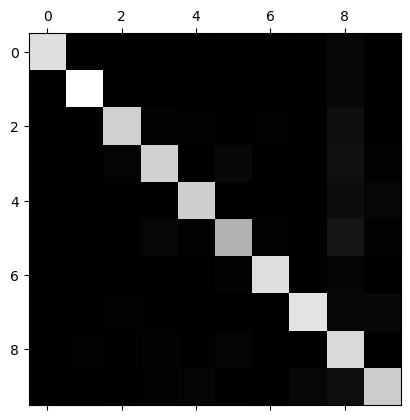

In [42]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [43]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

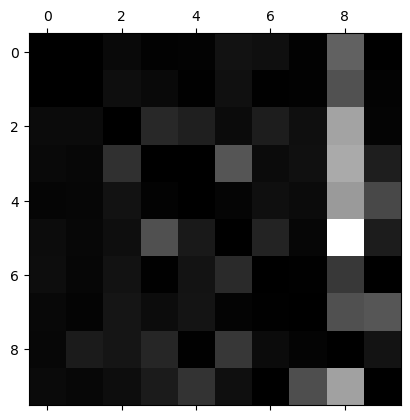

In [44]:
np.fill_diagonal(norm_conf_mx, 0) 
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_35724\2820912922.py:31: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_35724\2820912922.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_35724\2820912922.py:33: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_35724\2820912922.py:34: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X_bb = X_train[(y_train == cl_b

ZeroDivisionError: integer division or modulo by zero

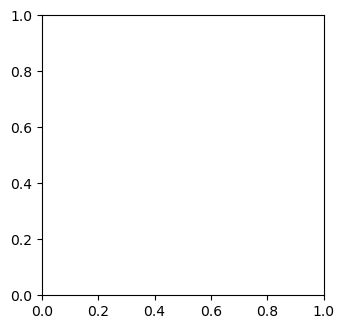

In [45]:
def plot_digit(data):
    image = data.values.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.values.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).values.reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
y_train_numerical = y_train.astype(int)
y_train_large = (y_train_numerical == 7)  # Equality comparison
y_train_odd = (y_train_numerical % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier() 
knn_clf.fit(X_train, y_multilabel)


In [ ]:

knn_clf.predict([some_digit])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train +noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test



In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier 

knn_clf = KNeighborsClassifier() 

pipeline = Pipeline([('knnclf', knn_clf)])
param_grid = [{'knnclf__weights': ["uniform", "distance"], 'knnclf__n_neighbors': [3, 4, 5]}]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

gs = GridSearchCV(pipeline, param_grid=param_grid)
gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('knnclf', KNeighborsClassifier())]),
             param_grid=[{'knnclf__n_neighbors': [3, 4, 5],
                          'knnclf__weights': ['uniform', 'distance']}])

In [35]:
gs.score(X_test, y_test)

0.9731428571428572

In [ ]:
from sklearn.metrics import accuracy_score

y_preds = gs.predict(X_test)

score = accuracy_score(y_test, y_preds)
score

## #2 Data augmentation

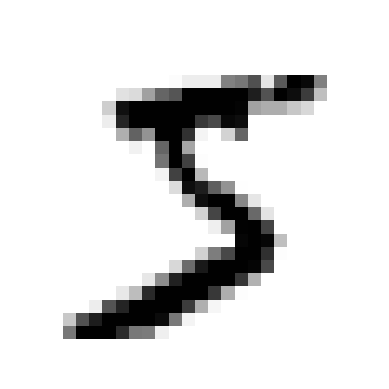

In [7]:
from scipy.ndimage import shift
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt

def plot_digit_s(data):
        image = data.values.reshape(28, 28)
        plt.imshow(image, cmap = mpl.cm.binary,
        interpolation="nearest")
        plt.axis("off")
        
def plot_digit_n(data):
        image = data.reshape(28, 28)
        plt.imshow(image, cmap = mpl.cm.binary,
        interpolation="nearest")
        plt.axis("off")

#shifted_array = shift(input_array, shift_amount

plot_digit_s(X.iloc[0])


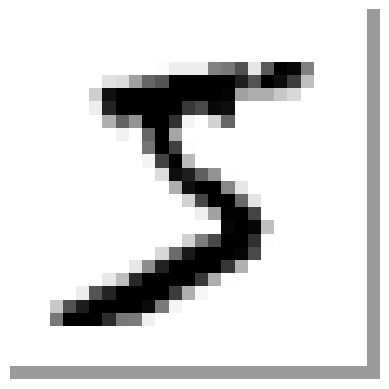

In [15]:
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit_n(shift_digit(some_digit, -1, -1, new=100))

In [ ]:
X_reshaped = X.iloc[0].values.reshape(28, 28)

X_reshaped.shape

In [30]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

((280000, 784), (280000,))

In [40]:
len(X_train_expanded)

280000

In [36]:
gs.best_params_

{'knnclf__n_neighbors': 4, 'knnclf__weights': 'distance'}

In [37]:
knn_clf_best = KNeighborsClassifier(n_neighbors=gs.best_params_['knnclf__n_neighbors'],
                                   weights=gs.best_params_['knnclf__weights'])

In [39]:
knn_clf_best.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [58]:
from sklearn.metrics import accuracy_score
y_preds = knn_clf_best.predict(X_test)

acc = accuracy_score(y_test, y_preds)


C:\Users\Sarthak\miniconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [59]:
acc

0.9797142857142858

In [52]:
ambiguous_digit = X_test.iloc[2700]
knn_clf_best.predict_proba([ambiguous_digit])

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

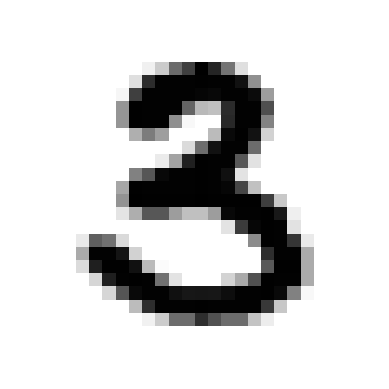

In [55]:
plot_digit_s(ambiguous_digit)